# Physical activity as an effect modificator of lifestyle factors on

small vessel deisease burden

[Andreas Gammelgaard Damsbo](https://pure.au.dk/portal/en/persons/andreas-gammelgaard-damsbo(e3c4afce-3eba-4456-8b8b-2fd90775c87a).html) [](https://orcid.org/0000-0002-7559-1154) ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/), [Steno Diabetes Centre](https://www.stenoaarhus.dk/))  
Rolf Ankerlund Blauenfeldt ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Sigrid Breinholt Vestergaard ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Niels Lech Pedersen ([Department of Clinical Medicine](https://clin.au.dk/))  
Kim Morgenstjerne Østerskov ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Mette Foldager Hindsholm ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Arzu Bilgin-Freiert ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Claus Ziegler Simonsen ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Rikke Beese Dalby ([South Denmark University Hospital](https://regionsyddanmark.dk/fagfolk/forskning/syddansk-universitetshospital), [Department of Clinical Medicine](https://clin.au.dk/))  
Grethe Andersen ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))  
Janne Kaergaard Mortensen ([Danish Stroke Centre](https://www.en.auh.dk/departments/danish-stroke-centre/), [Department of Clinical Medicine](https://clin.au.dk/))

**Background and aims** Physical activity (PA) may reduce the development of small vessel disease (SVD). The effect of physical activity and more classical vascular risk factors such as hypertension and diabetes in the development of SVD is debated, however. We aim to investigate the effect modification of physical activity on traditional vascular risk factors and the burden of small vessel disease among acute ischemic stroke patients.

**Methods** We have pooled patients from two clinical trials on acute ischemic stroke treatment. The main outcome is an ordinal scale score of quantified MR biomarkers of small vessel disease (SVD) burden based on visually assessed acute stroke scans (T2\* or SWI and FLAIR sequences). Biomarkers includes microbleeds, old lacunar infarcts, superficial siderosis, white matter hyperintensities and atrophy. Covariates includes age, sex, pre-stroke physical activity, diabetes, hypertension, atrial fibrillation and previous cardiovascular diseases. Pre-stroke PA was assessed with a questionnaire on inclusion within a few days after stroke onset. Data will be analyzed using bivariate and multivariate linear regression analysis.

**Results** We expect to include a total of around 1000 adult patients admitted to the comprehensive stroke centre at Aarhus University Hospital between 2013-2022. Preliminary results will be presented at ESOC 2024.

**Conclusions** Physical activity may be an important factor in modifying the risk of SVD development in stroke patients.

In [ ]:
source(here::here("R/functions.R"))

## Introduction

THe correlation between physical activity, small vessel disease and classical risk factors is very much debated and not fully understood.([Moniruzzaman et al. 2020](#ref-moniruzzaman2020); [Torres et al. 2019](#ref-torres2019); [Landman et al. 2021](#ref-landman2021))

In this abstract, we present the preliminary results from our pooled SVD study, also presented at [ESOC 2024](https://apps.congrex.com/esoc2024/en-GB/pag/presentation/362937).

## Methods

This study is a cross-sectional study, based on a pooled dataset from two different randomised, clinical trials on patients with acute stroke.

## Results

Please refer to <a href="#fig-flowchart" class="quarto-xref">Figure 1</a> for an overview of subjects included for analysis.

consort_diagram 
 
<!-- label6 -->
 
 label6 
 
 Pooled subjects with AIS 
 
<!-- label7 -->
 
 label7 
 
 Subjects available for initial analysis 
 
<!-- label6->label7 -->
<!-- label8 -->
 
 label8 
 
 Subjects available for final analysis 
 
<!-- label7->label8 -->
<!-- node1 -->
 
 node1 
 
 All subjects (n=1055) 
 
<!-- P1 -->
 
 P1 
 
 
<!-- node1->P1 -->
 
 node1->P1 
 
 
<!-- node2 -->
 
 node2 
 
 No MR (n=175): 
 • No acute MR performed (n=169) 
 • Not assessed (n=3) 
 • Other reasons (n=3) 
 
<!-- node3 -->
 
 node3 
 
 Patients considered (n=880) 
 
<!-- P2 -->
 
 P2 
 
 
<!-- node3->P2 -->
 
 node3->P2 
 
 
<!-- node4 -->
 
 node4 
 
 No PASE available (n=115): 
 • Missing (n=115) 
 
<!-- node5 -->
 
 node5 
 
 Patients included (n=765) 
 
<!-- P1->node2 -->
 
 P1->node2 
 
 
 
<!-- P1->node3 -->
 
 P1->node3 
 
 
 
<!-- P2->node4 -->
 
 P2->node4 
 
 
 
<!-- P2->node5 -->
 
 P2->node5

In [ ]:
skimr::skim(targets::tar_read("complete_scores") |> (\(.i){
  .i |> dplyr::mutate(dplyr::across(names(.i)[-c(1:2)], ~ factor(.x)))
})())

Baseline characteristics are included with the <a href="#tbl-baseline" class="quarto-xref">Table 2</a>.

In [ ]:
targets::tar_read("complete_scores") |>
  dplyr::select(-c("record_id", "user")) |>
  dplyr::mutate(dplyr::across(
    dplyr::all_of(c("microbleed", "lacunes")),
    ~ factor(.x,
      levels = .x |>
        dsub("^>", "9r_") |>
        as.factor() |>
        levels() |>
        dsub("^9r_", ">")
    )
  )) |>
  gtsummary::tbl_summary()

In [ ]:
targets::tar_read("clin_data") |>
  dplyr::select(-record_id, -trial_id, -inclusion_date) |>
  gtsummary::tbl_summary(by = trial)

In [ ]:
targets::tar_read("df_complete") |>
  dplyr::filter(!is.na(pase_0), !is.na(simple_score)) |>
  get_vars(c("pre", "clin")) |>
  # dplyr::mutate(female_sex = dplyr::if_else(female_sex, "Female", "Male")) |>
  dplyr::transmute(simple_score, age, female_sex= dplyr::if_else(female_sex, "Female", "Male"), nihss, tpa, evt, pase_0, alone) |>
  labelling_data() |>
  gtsummary::tbl_summary(by = female_sex, missing = "no") |>
  # gtsummary::add_p() |>
  gtsummary::add_overall()

Scoring reliability between raters has been compared using different metrics, to show different nuances to the performance, see <a href="#tbl-irr" class="quarto-xref">Table 3</a>. The main performance measure is the intraclass correlation ceofficient.

In [ ]:
targets::tar_read("ls_data") |>
  purrr::pluck("svd_score") |>
  dplyr::filter(svd_perf == "Ja", redcap_repeat_instance %in% 1:2) |>
  dplyr::select(record_id, redcap_repeat_instance, svd_microbleed, svd_lacunes, svd_wmh, svd_atrophy) |>
  simple_score() |>
  tibble::as_tibble() |>
  irr_icc_calc() |>
  gt::gt() |>
  gt::fmt_number(n_sigfig = 2)

ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(.x)

  # Now:
  data %>% select(all_of(.x))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.

Joining with `by = join_by(Variable)`

Below is the initial evaluation of possible PA effect modification on classical risk factors, <a href="#tbl-olr" class="quarto-xref">Table 4</a>. These results indicates no effect modification as odds ratios are largely unchanged, when PA is introduced in the model (on the right). This may not be the optimal method for this kind of evaluation, though.

In [ ]:
ls <- c(FALSE, TRUE) |>
  purrr::map(main_analysis, get_vars(targets::tar_read("df_complete"), vars.groups = "poster") |>
    dplyr::mutate(
      simple_score = factor(simple_score)
    )) |>
  purrr::map(function(.x) fix_labels(.x)) |>
  setNames(c("1 Without PA", "2 With PA"))

p1 <- ls |>
  purrr::imap(function(.x, .i) {
    .x[["table_body"]] |>
      dplyr::select(label, estimate, conf.low, conf.high) |>
      dplyr::mutate(model = .i)
  }) |>
  dplyr::bind_rows() |>
  dplyr::mutate(
    label = factor(label, levels = rev(get_set_label("poster")[-1]))
  ) |>
  coef_forrest_plot(cols = viridis::viridis(7)[c(1,5)] )

p1 + ggplot2::facet_wrap(facets = ggplot2::vars(model), ncol = 2)
# p1 |> poster_coef_print(here::here("post.png"))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

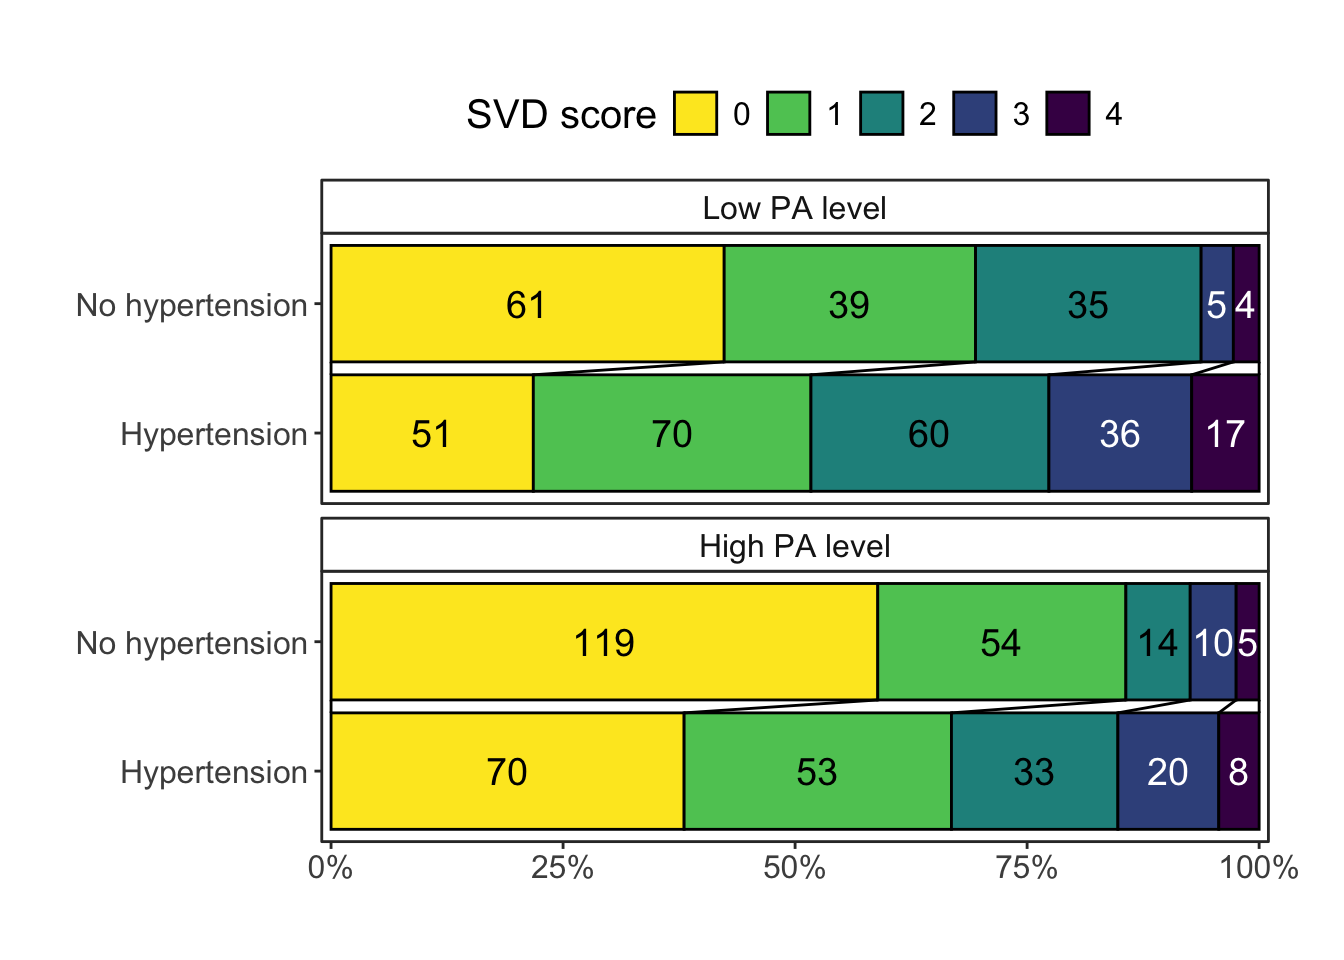

In [ ]:
p <- targets::tar_read("df_complete") |>
  dplyr::transmute(simple_score,
    hyperten = dplyr::if_else(hyperten, "Hypertension", "No hypertension"),
    pase_0 = stRoke::quantile_cut(pase_0, groups = 2, group.names = c("Low PA level", "High PA level"))
  ) |>
  table() |>
  rankinPlot::grottaBar(
    scoreName = "simple_score",
    groupName = "hyperten",
    strataName = "pase_0",
    textColor = c("black", "white"),
    textCut = 3,
    printNumbers = "count"
  ) +
  ggplot2::labs(fill = "SVD score") +
  viridis::scale_fill_viridis(discrete = TRUE, direction = -1, option = "viridis")

Based on the preliminary SVD-scores, SVD score distribution stratified by PA quartile is presented in <a href="#fig-svd_dist" class="quarto-xref">Figure 2</a>.

In [ ]:
# renv::install("agdamsbo/rankinPlot")
p <- targets::tar_read("df_complete") |>
  dplyr::transmute(simple_score,
    pase_0 = stRoke::quantile_cut(pase_0,
      groups = 4,
      group.names = glue::glue("Q{1:4}")
    )
  ) |>
  table() |>
  rankinPlot::grottaBar(
    scoreName = "simple_score",
    groupName = "pase_0",
    textColor = c("black", "white"),
    textCut = 3,
    printNumbers = "none",
    lineColor = "black",
    lineSize = 1,
    drawLines = FALSE,
    returnData = TRUE
  ) |>
  (\(.x){
    .x$plot + ggplot2::geom_text(data = .x$rectData[which(.x$rectData$n >
  0), ],
  # size = 6,
  fontface = "plain", ggplot2::aes(
  x = group,
  y = p_prev + 0.49 * p, color = as.numeric(score) >
    2,
  # label = paste0(sprintf("%2.0f", 100 * p),"%"),
  label = paste0(sprintf("%2.0f", 100 * p), "%")
)) +
  ggplot2::labs(fill = "SVD score") +
  ggplot2::ylab("Physical activity level")+
  viridis::scale_fill_viridis(discrete = TRUE, direction = -1, option = "D")
  })()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.

In [ ]:
ggplot2::ggsave(
  filename = here::here("grotta_pa_svd.png"),
  p +
    ggplot2::theme_minimal() +
    ggplot2::theme(
      legend.position = "none",
      panel.grid.major = ggplot2::element_blank(),
      panel.grid.minor = ggplot2::element_blank(),
      panel.border = ggplot2::element_blank(),
      panel.grid = ggplot2::element_blank(),
      axis.text.y = ggplot2::element_blank(),
      axis.title.y = ggplot2::element_blank(),
      axis.text.x = ggplot2::element_blank(),
      axis.title.x = ggplot2::element_blank(),
      text = ggplot2::element_text(size = 25),
      plot.title = ggplot2::element_text(),
      panel.background = ggplot2::element_blank()
    ),
  units = "cm",
  width = 65,
  height = 12,
)

In [ ]:
targets::tar_read("df_complete") |>
  get_vars(vars.groups = c("pre")) |>
  (\(ds){
    genodds::genodds(response = ds$simple_score, group = stRoke::quantile_cut(ds$pase_0, groups = 2, group.names = c("low", "high")), strata = ds$diabetes)
  })()

Warning in genodds::genodds(response = ds$simple_score, group =
stRoke::quantile_cut(ds$pase_0, : Dropped 291 observations with missing values

     Agresti's Generalized odds ratios

  FALSE        Odds: 0.618 (0.521, 0.733)      p=0.0000
  TRUE         Odds: 0.678 (0.420, 1.093)      p=0.1109

Test of H0: odds ratios are equal among strata:
  X-squared = 0.13, df= 1    p=0.7209

Test of H0: pooled odds = 1:
  Pooled odds: 0.624 (0.532,0.733)  p=0.0000
--------------------------------------------

In the FALSE stratum:
    Of 100 patients given high instead of low:
      * 24.81 will score higher with high
      * 48.43 will score higher with low
      * 26.76 appear the same with either treatment

In the TRUE stratum:
    Of 100 patients given high instead of low:
      * 27.62 will score higher with high
      * 46.83 will score higher with low
      * 25.55 appear the same with either treatment

Warning in genodds::genodds(response = ds$mrs_eos, group = ds$simple_score == :
Dropped 225 observations with missing values

     Agresti's Generalized odds ratios

     Odds: 0.759 (0.651, 0.884)      p=0.0004
--------------------------------------------
    Of 100 patients given TRUE instead of FALSE:
      * 30.77 will score higher with TRUE
      * 44.51 will score higher with FALSE
      * 24.72 appear the same with either treatment

## Discussion

The numbers and figures presented here are very much preliminary and should only be used for discussion and inspiration. Also, if you have any interest in collaboration, please reach out!

Landman, Thijs Rj, Dick Hj Thijssen, Anil M. Tuladhar, and Frank-Erik de Leeuw. 2021. “Relation between physical activity and cerebral small vessel disease: A nine-year prospective cohort study.” *International Journal of Stroke: Official Journal of the International Stroke Society* 16 (8): 962–71. <https://doi.org/10.1177/1747493020984090>.

Moniruzzaman, Mohammad, Aya Kadota, Hiroyoshi Segawa, Keiko Kondo, Sayuki Torii, Naoko Miyagawa, Akira Fujiyoshi, et al. 2020. “Relationship Between Step Counts and Cerebral Small Vessel Disease in Japanese Men.” *Stroke* 51 (12): 3584–91. <https://doi.org/10.1161/STROKEAHA.120.030141>.

Torres, Elisa R., Siobhan M. Hoscheidt, Barbara B. Bendlin, Vincent A. Magnotta, Gabriel D. Lancaster, Roger L. Brown, and Sergio Paradiso. 2019. “Lifetime Physical Activity and White Matter Hyperintensities in Cognitively-Intact Adults.” *Nursing Research* 68 (3): 210–17. <https://doi.org/10.1097/NNR.0000000000000341>.